In [1]:
import fnmatch
import json
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics

def load_json(filepath):
    """
    Load a json file
    Inputs
        filepath: string, path to file
    Outputs:
        data: dictionary, json key, value pairs
    """
    with open(filepath, "rt") as fp:
        data = json.load(fp)
    return data

def GetJSONSteeringAngles(filemask):
    """
    Get steering angles stored as 'user/angle' attributes in .json files
    Inputs:
        filemask: string, path and mask
    Outputs
        svals: list, steering values
    """
    filemask = os.path.expanduser(filemask)
    path, mask = os.path.split(filemask)

    matches = []
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, mask):
            matches.append(os.path.join(root, filename))

    # matches = sorted(matches, key=os.path.getmtime)
    
    # steering values
    svals = []
    for fullpath in matches:
            frame_number = os.path.basename(fullpath).split("_")[0]
            json_filename = os.path.join(os.path.dirname(fullpath), "record_" + frame_number + ".json")
            jobj = load_json(json_filename)
            svals.append(jobj['user/angle'])
    return svals

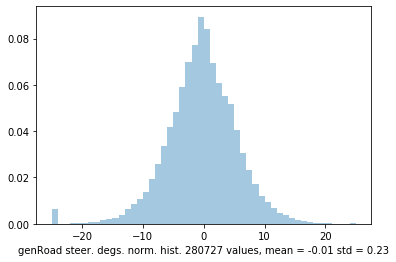

In [5]:
#als = GetJSONSteeringAngles('~/git/msc-data/unity/genRoad/*.jpg')
#es = len(svals)
# Unity steering angle
#nityMaxSteering = 25#
#valscp = [element * UnityMaxSteering for element in svals]
# NB Plotted as normalized histogram
#ns.distplot(svalscp, bins=50, kde=False, norm_hist=True, 
#            axlabel='Steering Angles (degrees) norm. hist. ' + str(values) + " data points \n \
#            mean = 0.00 std = 0.00")

# sns_plot.savefig("output.png")
def jsonSteeringBins(filemask, pname="output", save=True, nc=25):
    """
    Plot a steering values' histogram
    Inputs
        filemask: string, where to search for images, and corresponding .json files
        pname: string, output plot name
        save: boolean, save plot to disk
        nc: int, normalization constant, used in the simulator to put angles in range
        -1, 1. Default is 25.
    Outputs
        svals: list containing non-normalized steering angles
    """
    svals = GetJSONSteeringAngles(filemask)
    svalscp = [element * nc for element in svals]
    values = len(svalscp)
    mean = ("%.2f" % statistics.mean(svals))
    std = ("%.2f" % statistics.stdev(svals))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True, 
    axlabel= pname + ' steer. degs. norm. hist. ' + str(values) + ' values, mean = ' + mean + ' std = ' + std)
    #if(save):
    #    sns.save("output.png")
    plt.savefig(pname + '.png')

    # return for downstream processing if required
    return svals

def listSteeringBins(svals, pname="output", save=True, nc=25):
    """
    Plot a steering values' histogram
    Inputs
        svals: list, array of normalized steering values
        pname: string, output plot name
        save: boolean, save plot to disk
        nc: int, normalization constant, used in the simulator to put angles in range
        -1, 1. Default is 25.
    Outputs
        none
    """
    svalscp = [element * nc for element in svals]
    values = len(svalscp)
    mean = ("%.2f" % statistics.mean(svals))
    std = ("%.2f" % statistics.stdev(svals))
    plt.title=(pname)
    # NB Plotted as normalized histogram
    sns.distplot(svalscp, bins=nc*2, kde=False, norm_hist=True, 
    axlabel= pname + ' steer. degs. norm. hist. ' + str(values) + ' values, mean = ' + mean + ' std = ' + std)
    #if(save):
    #    sns.save("output.png")
    plt.savefig(pname + '.png')

    # return for downstream processing if required
    return svals

svals = jsonSteeringBins('~/git/msc-data/unity/genRoad/*.jpg', 'genRoad')

In [52]:
def printTimeMS(nf, fr):
    """
    Print time in minutes and seconds.
    Inputs
        nf: integer, number of frames
        fr: float, frame rate
    Outputs
        None
    """
    total_secs = nf / fr
    minutes = int(nf / fr / 60)
    seconds = round(nf / fr / 60 % minutes * 60)
    print("{}m{}s".format(minutes, seconds))

printTimeMS(45410, 24)
printTimeMS(280727, 24)
 

31m32s
194m57s


31m32s
194m57s


In [87]:
# simpler
import datetime
str(datetime.timedelta(seconds=280727/24))

'3:14:56.958333'

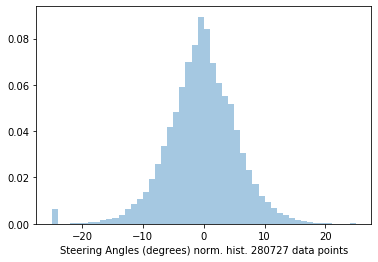

In [4]:
svals = GetJSONSteeringAngles('~/git/msc-data/unity/genRoad/*.jpg')
values = len(svals)
# Unity steering angle
UnityMaxSteering = 25
svalscp = [element * UnityMaxSteering for element in svals]
# NB Plotted as normalized histogram
sns.distplot(svalscp, bins=50, kde=False, norm_hist=True, 
             axlabel='Steering Angles (degrees) norm. hist. ' + str(values) + " data points")

In [99]:
def printJSONSteeringAngles(filemask):
    """
    Get steering angles stored as 'user/angle' attributes in .json files
    Inputs:
        filemask: string, path and mask
    Outputs
        svals: list, steering values
    """
    filemask = os.path.expanduser(filemask)
    path, mask = os.path.split(filemask)

    matches = []
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, mask):
            matches.append(os.path.join(root, filename))

    # steering values
    svals = []
    for fullpath in matches:
            frame_number = os.path.basename(fullpath).split("_")[0]
            json_filename = os.path.join(os.path.dirname(fullpath), "record_" + frame_number + ".json")
            jobj = load_json(json_filename)
            svals.append(jobj['user/angle'])
    return svals
    # return svals
svals = printJSONSteeringAngles('~/git/sdsandbox/sdsim/log/*.jpg') 
cnt = 0
sec = 0
for vals in svals:
    cnt += 1
    if(cnt % 24 == 0):
        sec += 1
        print("Frame {} ========================".format(sec))
    print(vals)

0.1462351679801941
0.2908710837364197
-0.01107069756835699
0.6596772074699402
0.3969305753707886
0.06521641463041306
-0.23137570917606354
0.42970988154411316
-0.0011511871125549078
0.3745867908000946
0.00030205384246073663
0.0007079345523379743
-0.002569027943536639
-0.27411186695098877
0.05056416988372803
-0.0003286529390607029
-0.08864340931177139
-0.1615009307861328
0.5029380321502686
-0.1429503709077835
0.4899037480354309
-0.002380438381806016
-0.0005150085198692977
Frame 1 ========================
0.46252018213272095
0.49402090907096863
-0.1022811233997345
0.4777838885784149
0.01010439358651638
0.4650617837905884
0.07714910805225372
0.06114380434155464
0.44778963923454285
0.4779098629951477
-0.13109035789966583
0.4480268061161041
0.2896142601966858
0.0459853932261467
-0.012812335044145584
0.3193214535713196
0.02310115098953247
0.018060920760035515
-0.015665976330637932
-0.10550586879253387
0.241231307387352
0.2548680007457733
0.11396659910678864
0.03476964682340622
Frame 2 =======

In [116]:
UnityMaxSteering = 25
svalscp = [element * UnityMaxSteering for element in svals]
my_iterator = filter(lambda svalscp: svalscp <= 20 and svalscp >= -20, svalscp)

svals2020 = list(my_iterator)

rm = len(svals) - len(svals2020)
pctrm =  rm * 100  / len(svals)
print("Removed entries outside -20 + 20 range: ", len(svals) - len(svals2020))
print("%.2f" % pctrm)


Removed entries outside -20 + 20 range:  2204
0.79


In [121]:
# mean and std
import statistics
print("%.2f" % statistics.mean(svals2020))
print("%.2f" % statistics.stdev(svals2020))

-0.18
5.37


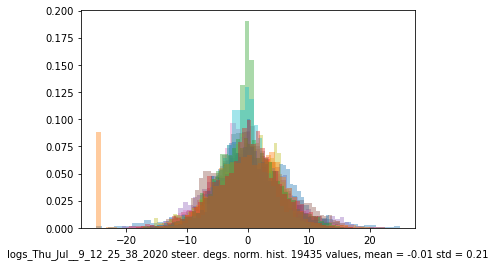

In [6]:
######################
# SkewClenaup.png
######################


# genRoad outlier cleanup
# NB Name is last one plotted
# plot everything
# used in SkewCleanup.png
import os
# plot all - nice effect but breaks kernel
# Now let's do one plot per folder to find out where these outliers are
path = '~/git/msc-data/unity/genRoad' # both work
path = '../../dataset/unity/genRoad/' 
dirs = os.walk(path)
for mydir in dirs:
    if (len(mydir[1]) == 0):
        fn = mydir[0].split('/')
        path = mydir[0] + '/*.jpg'
        svals = jsonSteeringBins(path, fn[-1])

        
# deleted empties logs_Thu_Jul__9_16_12_28_2020        
# both ~/git ... and ../.. work ok
# \../../dataset/unity/genRoad/logs_Thu_Jul__9_12_25_38_2020/*.jpg', 'test')


In [20]:
import os
# plot all - nice effect but breaks kernel
# Now let's do one plot per folder to find out where these outliers are
path = '~/git/msc-data/unity/genRoad' # both work
path = '../../dataset/unity/genRoad/' 
dirs = os.walk(path)
for mydir in dirs:
    if (len(mydir[1]) == 0):
        fn = mydir[0].split('/')
        path = mydir[0] + '/*.jpg'
        print("svals = jsonSteeringBins('{}', '{}')".format(path, fn[-1]))
        # svals = jsonSteeringBins(path, fn[-1])

svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_29_13_2020/*.jpg', 'logs_Fri_Jul_10_09_29_13_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_15_47_22_2020/*.jpg', 'logs_Thu_Jul__9_15_47_22_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_16_06_19_2020/*.jpg', 'logs_Thu_Jul__9_16_06_19_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_15_53_22_2020/*.jpg', 'logs_Thu_Jul__9_15_53_22_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_32_12_2020/*.jpg', 'logs_Fri_Jul_10_09_32_12_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_12_57_15_2020/*.jpg', 'logs_Thu_Jul__9_12_57_15_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_13_03_17_2020/*.jpg', 'logs_Thu_Jul__9_13_03_17_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_12_33_37_2020/*.jpg', 'logs_Thu_Jul__9_12_33_37_2020')


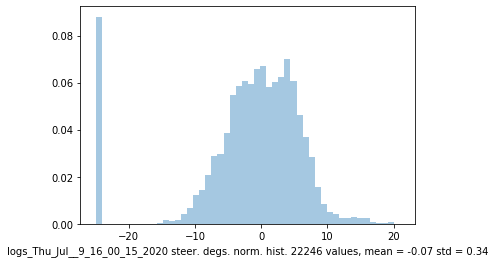

In [34]:
# find skewer 
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_29_13_2020/*.jpg', 'logs_Fri_Jul_10_09_29_13_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_15_47_22_2020/*.jpg', 'logs_Thu_Jul__9_15_47_22_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_16_06_19_2020/*.jpg', 'logs_Thu_Jul__9_16_06_19_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_15_53_22_2020/*.jpg', 'logs_Thu_Jul__9_15_53_22_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_32_12_2020/*.jpg', 'logs_Fri_Jul_10_09_32_12_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_12_57_15_2020/*.jpg', 'logs_Thu_Jul__9_12_57_15_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_13_03_17_2020/*.jpg', 'logs_Thu_Jul__9_13_03_17_2020')
# svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_12_33_37_2020/*.jpg', 'logs_Thu_Jul__9_12_33_37_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_14_59_57_2020/*.jpg', 'logs_Thu_Jul__9_14_59_57_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_22_57_2020/*.jpg', 'logs_Fri_Jul_10_09_22_57_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_16_08_45_2020/*.jpg', 'logs_Thu_Jul__9_16_08_45_2020')
svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_16_00_15_2020/*.jpg', 'logs_Thu_Jul__9_16_00_15_2020')
#svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Fri_Jul_10_09_16_18_2020/*.jpg', 'logs_Fri_Jul_10_09_16_18_2020')
# svals = jsonSteeringBins('../../dataset/unity/genRoad/logs_Thu_Jul__9_12_25_38_2020/*.jpg', 'logs_Thu_Jul__9_12_25_38_2020')

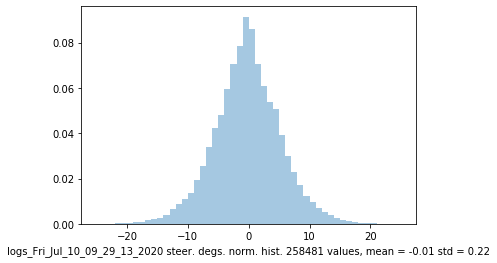

In [35]:
# moved skewing logs
# mv genRoad/logs_Thu_Jul__9_16_00_15_2020 quarantine/
svals = jsonSteeringBins('../../dataset/unity/genRoad/*.jpg', 'logs_Fri_Jul_10_09_29_13_2020')